In [3]:
import numpy as np
import os

In [4]:
import nibabel as nib
img = nib.load('IXI015-HH-1258-IXIMADisoTFE12_-s3T115_-0301-00003-000001-01.nii')

In [5]:
img.shape

(256, 256, 150)

In [6]:
img.get_data_dtype()

dtype('<i2')

In [7]:
img.affine.shape

(4, 4)

In [8]:
hdr = img.header

In [9]:
hdr.get_xyzt_units()

('mm', 'sec')

In [10]:
raw = hdr.structarr
raw['xyzt_units']

array(10, dtype=uint8)

In [11]:
print(hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 150   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     1.2000033  0.         0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'MR'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.48037913
quatern_c       : -0.52270734
quatern_d       : -0.45101398
qoffset_x       : -93.27156
qoffset_y 

In [12]:
img.in_memory

False

In [13]:
img.get_fdata()
img.in_memory

True

In [14]:
img.uncache()
img.in_memory

False

In [15]:
epi = img.get_fdata()
epi.shape

(256, 256, 150)

In [16]:
import matplotlib.pyplot as plt
def showslices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, origin="lower")

Text(0.5,0.98,'Slices of MR Images')

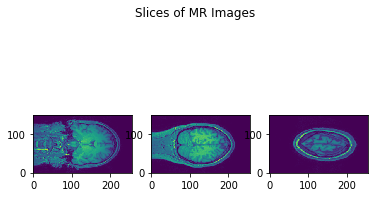

In [17]:
slice_0 = epi[130,: ,:]
slice_1 = epi[200, : ,:]
slice_2 = epi[:,200,:]
showslices([slice_0,slice_1,slice_2])
plt.suptitle('Slices of MR Images')

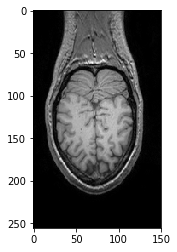

In [18]:
fig, ax = plt.subplots()
ax.imshow(slice_1, cmap="gray")
plt.show()

In [19]:
img_aff = img.affine

In [20]:
canonical_img = nib.as_closest_canonical(img)

In [21]:
#Calculating rician noise using real and imaginary part calculations 
import random
rand_noise_img = (slice_1)
random_factor = 0.15 * np.random.normal(loc=0., scale=1., size=slice_1.shape)
rand_noise_img_real = rand_noise_img + random_factor
rand_noise_img_img = random_factor
ran_noise_img_real = np.square(rand_noise_img_real) 
ran_noise_img_img = np.square(rand_noise_img_img) 
rician_noise_square =  ran_noise_img_img + ran_noise_img_real
rician_noise_img = np.sqrt(rician_noise_square)

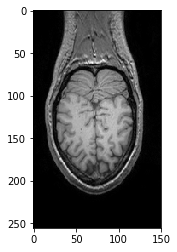

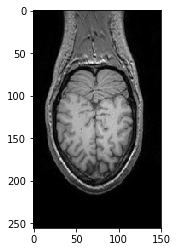

In [22]:
#Normal image
fig, ax = plt.subplots()
ax.imshow(slice_1, cmap="gray")
plt.show()
#Image with Rician Noise
fig, ax = plt.subplots()
ax.imshow(rician_noise_img, cmap="gray")
plt.show()

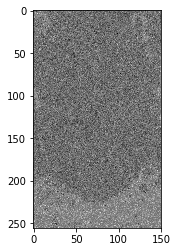

In [23]:
#Noise part of image 
noise_img = rician_noise_img - slice_1
fig, ax = plt.subplots()
ax.imshow(noise_img, cmap="gray")
plt.show()

In [24]:
import nibabel as nib
img = nib.load('t1_icbm_normal_5mm_pn0_rf0.mnc')

In [25]:
epi = img.get_fdata()
epi.shape

(36, 217, 181)

Text(0.5,0.98,'Slices of MR Images')

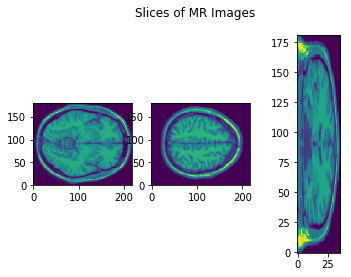

In [26]:
slice_0 = epi[13,: ,:]
slice_1 = epi[24, : ,:]
slice_2 = epi[:,120,:]
showslices([slice_0,slice_1,slice_2])
plt.suptitle('Slices of MR Images')

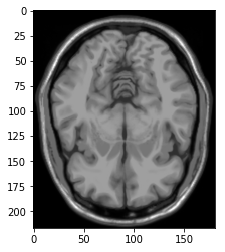

In [27]:
#noise_img = rician_noise_img - slice_1
fig, ax = plt.subplots()
ax.imshow(slice_0, cmap="gray")
plt.show()

Text(0.5,0.98,'Slices of MR Images')

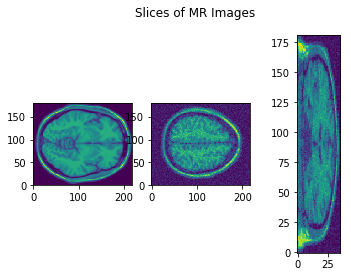

In [28]:
img = nib.load('t1_icbm_normal_5mm_pn9_rf0.mnc')
epi = img.get_fdata()
epi.shape
slice_5 = epi[13,: ,:]
slice_1 = epi[24, : ,:]
slice_2 = epi[:,120,:]
showslices([slice_0,slice_1,slice_2])
plt.suptitle('Slices of MR Images')

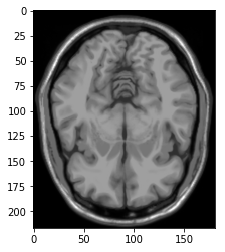

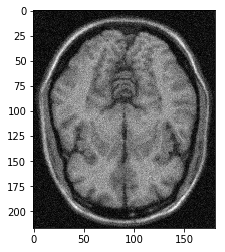

In [29]:
fig, ax = plt.subplots()
ax.imshow(slice_0, cmap="gray")
plt.show()
fig, ax = plt.subplots()
ax.imshow(slice_5, cmap="gray")
plt.show()

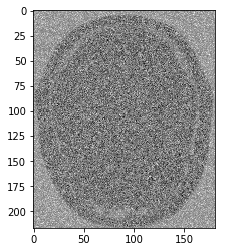

In [30]:
sl = slice_5-slice_0
fig, ax = plt.subplots()
ax.imshow(sl, cmap="gray")
plt.show()

In [50]:
#PSNR CALCULATION

import numpy as np
from math import log10, sqrt 
import numpy as np 
  
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    #print("mse:",mse)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.Therefore PSNR have no importance. 
                  
        return 100
    psnr_noisy = 20 * log10(255.0 / sqrt(mse)) 
    print('PSNR of reconstructed validation images: {psnr}dB'.format(psnr=np.round(psnr_noisy,2)))
  

In [49]:
PSNR(slice_0,slice_5)

mse: 4854.441246495905
PSNR of reconstructed validation images: 11.27dB
